In [9]:
import math
import random

import cv2
import numpy as np
import time

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

from matplotlib import pyplot as plt

In [17]:
road_angle_arr = np.load('../data/road_angle_data_v2.npy')
wheel_angle_arr = np.load('../data/steering_data_v2.npy')

outlier_thresh = 3 * np.std(wheel_angle_arr)
filter_arr = (wheel_angle_arr < outlier_thresh) & (wheel_angle_arr > -outlier_thresh)
wheel_angle_clean = wheel_angle_arr[filter_arr]
road_angle_clean = road_angle_arr[filter_arr[0:len(road_angle_arr)]]

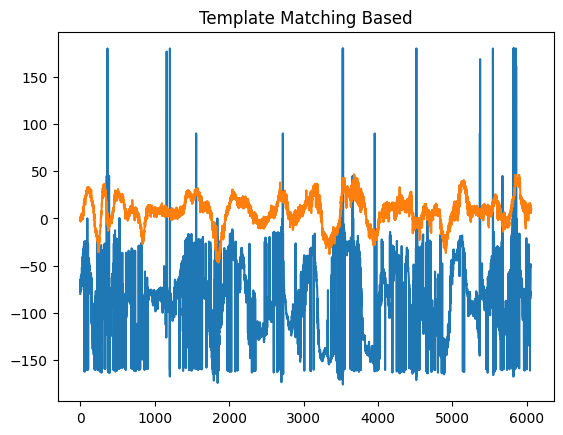

In [20]:
plt.plot(road_angle_clean)
plt.plot(wheel_angle_clean)
plt.title("Template Matching Based")
plt.show()

In [21]:
HIST_COEF = 500

road_angle_ts = []
wheel_angle_ts = []

exp_filt = [road_angle_clean[0]]
ALPHA = 0.1

for i in range(len(road_angle_clean)):
    if i < HIST_COEF:
        continue

    road_angle_ts.append(road_angle_clean[i - HIST_COEF:i])
    wheel_angle_ts.append(wheel_angle_clean[i])

road_angle_ts_arr = np.array(road_angle_ts)
wheel_angle_ts_arr = np.array(wheel_angle_ts)

print(road_angle_ts_arr.shape)

(5552, 500)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

model = model = SVR()
model.fit(road_angle_ts_arr, wheel_angle_ts_arr)

yp = model.predict(road_angle_ts_arr)

print(yp.shape)

print("R2", r2_score(wheel_angle_ts_arr, yp))
print("MSE", mean_squared_error(wheel_angle_ts_arr, yp)**0.5)

(5552,)
R2 0.691490135841949
MSE 8.338562354090298
